### Project (ii)
<h4> Steps: </h4>

- Load the 'ufo_sightings' dataset from the 'data' folder into a pandas Dataframe and explore it to understand its structures and features.
- Visualize the 50 first lines of the data using a barplot with the states and duration in seconds
- Preprocess the data, remove all the NaN's from the column state and country
- Sample the data using stratified sampling for the state column
- Split the data into a 80% training, 10% validation and 10% testing sets format

In [1]:
# Load the dataset into a pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataframe = pd.read_csv('../Lessons/data/ufo_sightings.csv', low_memory=False)
dataframe.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


<Axes: title={'center': 'State to duration ratio'}, xlabel='state', ylabel='duration (seconds)'>

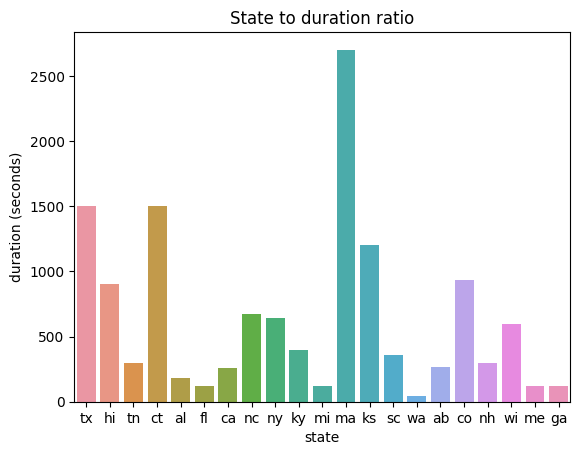

In [2]:
# Visualize the 50 first lines for the required columns
state = dataframe['state'].head(50)
duration = dataframe['duration (seconds)'].head(50).astype(int)

plt.title('State to duration ratio')
sns.barplot(data=dataframe, x=state, y=duration, errorbar=None)

In [3]:
# check how many NaNs in 'state' column
dataframe['state'].isnull().sum()

5797

In [4]:
# Replace the NaNs for the required columns
dataframe['state'].fillna(dataframe['state'].mode()[0], inplace=True)
dataframe['country'].fillna(dataframe['country'].mode()[0], inplace=True)

In [5]:
# check again how many NaNs in 'state' column
dataframe['state'].isnull().sum()

0

In [6]:
# Split the data
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataframe, test_size=0.1, random_state=1, stratify=dataframe['state'])
train, validate = train_test_split(dataframe, test_size=0.1, random_state=1, stratify=dataframe['state'])

In [7]:
print(f"Train size: {len(train)}")
print(f"Validation size: {len(validate)}")
print(f"Test size: {len(test)}")

Train size: 72298
Validation size: 8034
Test size: 8034
